In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    X = df.iloc[:, 1:].values
    y = df.iloc[:, :1].values.reshape(-1)
    features = df.iloc[:, 1:].columns.values

    return (X, y, features)

In [4]:
X_train, y_train, _ = load_data('perceptron_training_data.csv')
X_test, y_test, _ = load_data('perceptron_test_data.csv')

In [5]:
X_train.shape[1]

784

In [6]:
X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)

X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}

In [7]:
X_train.shape

(1000, 785)

## I. Perceptron Algorithm
### Online Perceptron Algorithm with below conditions

> a. Use subset of MNIST dataset : 1 - 3, -1 - 5  
> b. Initialize weights, bias to 0   
> c. Number of epoch = 100   

- Visualize training samples using first 30 samples in training data
- Plot the number of misclassifications over epochs on the training set
- Plot the accuracy over epochs on the test set

In [8]:
def plot_training_samples(X_train, y_train):
    
    fig = plt.figure(figsize=(16,7))

    for i in range(30):
        X_temp = X_train[i][:-1].reshape(28, 28)
        if y_train[i] == 1: label = 'label: 3'
        else: label = 'label: 5'
        subplot = fig.add_subplot(3, 10, i+1)
        subplot.imshow(X_temp, cmap='gray')
        subplot.set_title(label)
        subplot.axis('off')
    plt.show()
    
    return fig


def sgn(x):
    return (x >= 0)*2-1


def predict(X, y, w):
    
    correct = np.sum(sgn(np.dot(X['test'], w))==y['test'])
    accuracy = 100*correct/X['test'].shape[0]
    
    return accuracy


def perceptron(X, y, w, epoch):
   
    number_of_misclassifications = []
    test_accuracy = []
    
    for e in range(epoch):
        error = 0
        for i in range(X['train'].shape[0]):
            y_hat = sgn(np.dot(X['train'][i], w))
            if y_hat != y['train'][i]:
                error += 1
                w += y['train'][i]*X['train'][i]
        number_of_misclassifications.append(error)
        accuracy = predict(X, y, w)
        test_accuracy.append(accuracy)
    
    return w, number_of_misclassifications, test_accuracy


def plot_number_of_misclassifications_over_epochs(errors):
    
    fig = plt.figure(figsize=(17,5))
    plt.plot(errors)
    plt.title('number of misclassifications over epochs', fontsize=20)
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('number of misclassifications', fontsize=20)
    
    return fig


def plot_accuracy_over_epochs(test_accuracy):
    
    fig = plt.figure(figsize=(17,5))
    plt.plot(test_accuracy)
    plt.title('test accuracy over epochs', fontsize=20)
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('test accuracy', fontsize=20)
    
    return fig

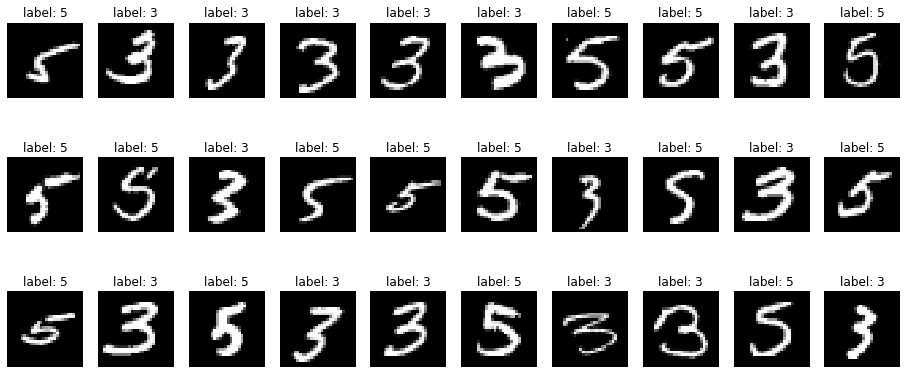

In [9]:
fig = plot_training_samples(X_train, y_train)

In [10]:
w = np.zeros(X['train'].shape[1])
epoch = 100

In [11]:
w, number_of_misclassifications, test_accuracy = perceptron(X, y, w, epoch)

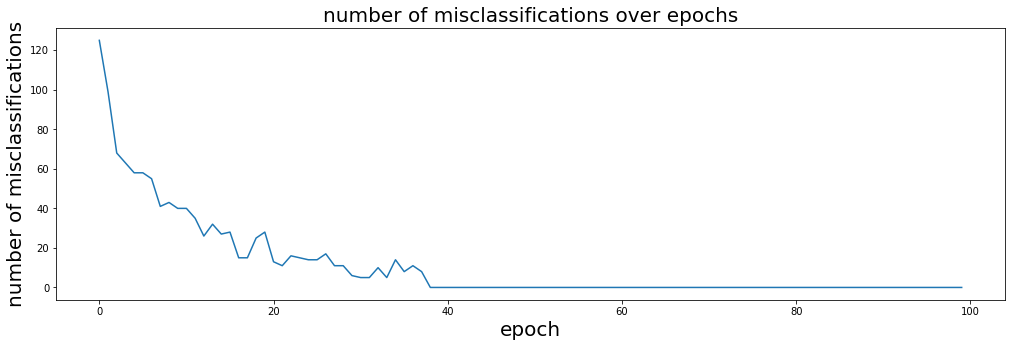

In [12]:
fig = plot_number_of_misclassifications_over_epochs(number_of_misclassifications)

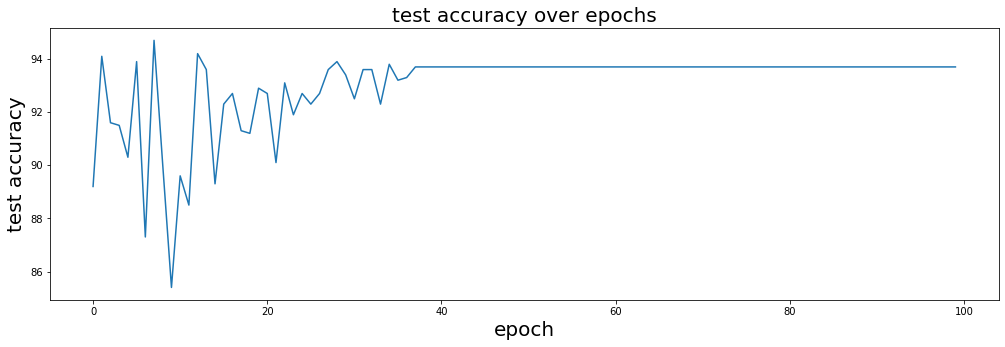

In [13]:
fig = plot_accuracy_over_epochs(test_accuracy)